Mounted at /content/drive


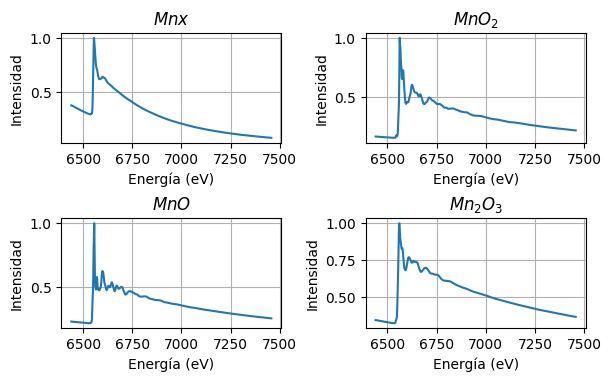

In [ ]:
from google.colab import drive
from pandas import read_csv
import os
import numpy as np
import matplotlib.pyplot as plt

drive.mount("/content/drive", force_remount=True)

archivos = ['Mnx.dat', 'MnO2.dat', 'MnO.dat', 'Mn2O3.dat']
ruta_carpeta = '/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP3/datos/'

# Carga los DataFrames y añádelos a una lista
dataframes = []
for archivo in archivos:
    ruta_archivo = os.path.join(ruta_carpeta, archivo)
    df = read_csv(ruta_archivo, sep='\t')
    df = df.iloc[:, [0, 1, 2]]  # Selecciona las columnas 1, 2 y 3
    df.columns = ['Energía', 'I0', 'Intensidad']  # Renombra las columnas
    dataframes.append(df)

# Resta la columna 'I0' de la columna 'Intensidad5'
for df in dataframes:
    df['Intensidad'] = df['I0'] / df['Intensidad']

# Normaliza los espectros dividiendo por el valor máximo de 'Intensidad'
for df in dataframes:
    df['Intensidad'] = df['Intensidad'] / df['Intensidad'].max()

# Grafica cada DataFrame en un subplot
width = 6  # Ancho de la figura en pulgadas
height = width * (5**0.5 - 1) / 2  # Altura calculada en función del ancho para mantener la proporción áurea
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(width, height), constrained_layout=True)

titulos = ['$Mnx$', '$MnO_2$', '$MnO$', '$Mn_2O_3$']
for i, df in enumerate(dataframes):
#    archivo_sin_extension = os.path.splitext(archivos[i])[0]
    ax = axs[i // 2, i % 2]
    ax.plot(df['Energía'], df['Intensidad'])
    ax.set_title(titulos[i])
    ax.set_xlabel('Energía (eV)')
    ax.set_ylabel('Intensidad')
    ax.grid()

ruta_figura = '/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP3/espectros.png'
plt.savefig(ruta_figura)

# Muestra la figura en pantalla
plt.show()

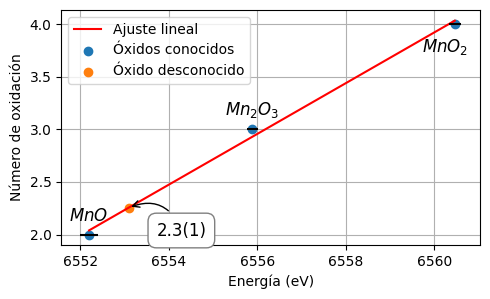

2.2545755405465115
0.08708880891684337


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Bordes = np.array([6555.888, 6552.19655, 6560.46])
NroOx = np.array([3, 2, 4])
errores = np.array([0.12, 0.2, 0.14])

def model_f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(model_f, Bordes, NroOx)
a_opt, b_opt = popt
deltas = np.sqrt(np.diag(pcov))
deltaA, deltaB = deltas
x_model = np.linspace(min(Bordes), max(Bordes), 100)
y_model = model_f(x_model, a_opt, b_opt)

width = 5  # Ancho de la figura en pulgadas
height = width * (5 ** 0.5 - 1) / 2  # Altura calculada en función del ancho para mantener la proporción áurea
fig, ax = plt.subplots(figsize=(width, height))

ax.plot(x_model, y_model, color='r', label='Ajuste lineal')
ax.errorbar(Bordes, NroOx, xerr=errores, ls='', color='black')
ax.scatter(Bordes, NroOx, label='Óxidos conocidos')
ax.set_xlabel("Energía (eV)")
ax.set_ylabel('Número de oxidación')

# Etiquetas de muestra
muestra_labels = ['$Mn_2O_3$', '$MnO$', '$MnO_2$']
for i, txt in enumerate(muestra_labels):
    if i == len(muestra_labels) - 1:
        ax.annotate(txt, (Bordes[i], NroOx[i]), xytext=(10, -20),
                    textcoords='offset points', ha='right', fontsize=12)
    else:
        ax.annotate(txt, (Bordes[i], NroOx[i]), xytext=(0, 10),
                    textcoords='offset points', ha='center', fontsize=12)

ax.scatter(6553.08997, model_f(6553.08997, *popt), label='Óxido desconocido')

texto = '2.3(1)'
ax.annotate(texto, xy=(6553.08997, model_f(6553.08997, *popt)),
             xytext=(20, -20), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray'),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'),
             fontsize=12, fontname='DejaVu Sans')

ax.grid()
ax.legend(loc='upper left')
fig.tight_layout()

ruta_figura = '/content/drive/MyDrive/Cosas de la facu/Experimentos Cuanticos II/TP3/NvsE.png'
plt.savefig(ruta_figura)
plt.show()

deltaN = np.sqrt((deltaA/a_opt)*(deltaA/a_opt)+(deltaB/b_opt)*(deltaB/b_opt))

print(model_f(6553.08997, *popt)) #6553.23451 es el borde de absorción de la muestra desconocida
print(deltaN)
